In [ ]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from konlpy.tag import Komoran

In [ ]:
okt = Okt()
komoran = Komoran()

In [3]:
## 대상 자료
df = pd.read_csv('연관분석임시/seoul2.csv',encoding='utf8')
## 내용물 특수문자 제거
df['0'] = df['0'].str.replace('[\W+]',' ')
## na값 제거
df = df.dropna()
df.reset_index(drop=True,inplace=True)
# 넣을 문장 list
contents =[]
for c in range(len(df)):
    temp = df['0'][c]
    contents.append(temp)

In [4]:
# 단어 2차원 리스트
dataset = []
for i in range(len(temp)):
    tokens = okt.nouns(temp)
    tokens = [token for token in tokens if len(token) > 2]
    dataset.append(tokens)
dataset[:10]

[['안면도',
  '아일랜드',
  '인피니티',
  '여행지',
  '리스트',
  '아일랜드',
  '호캉스',
  '수영장',
  '아일랜드',
  '수영복',
  '아일랜드',
  '아일랜드',
  '안면도',
  '아일랜드',
  '아일랜드',
  '인피니티',
  '여행지',
  '여행지',
  '안면도',
  '아일랜드',
  '리조트',
  '금토일',
  '체크아웃',
  '금토일',
  '리조트',
  '사우나',
  '스티커',
  '안면도',
  '아일랜드',
  '안면도',
  '리조트',
  '스페셜',
  '패키지',
  '패키지',
  '패키지',
  '패키지',
  '스테이',
  '패키지',
  '봄내음',
  '패키지',
  '안면도',
  '해수욕장',
  '모터사이클',
  '오프로드',
  '스포츠',
  '패키지',
  '패키지',
  '패키지',
  '테이블',
  '안면도',
  '사우나',
  '여행객',
  '리조트',
  '편의점',
  '화이트',
  '포인트',
  '하이라이트',
  '서해안',
  '온돌방',
  '온돌방',
  '세면대',
  '냉장고',
  '인덕션',
  '전자렌지',
  '유리잔',
  '전기포트',
  '세면대',
  '화장실',
  '레이스',
  '프라이',
  '사진관',
  '플레이',
  '편의점',
  '오락실',
  '해수욕장',
  '수영복',
  '세탁실',
  '세탁실',
  '코타키나발루',
  '안면도',
  '해수욕장',
  '안면도',
  '해수욕장',
  '프라이',
  '패키지',
  '리조트',
  '레포츠',
  '탑승권',
  '사전예약',
  '패키지',
  '선생님',
  '카메라',
  '어트랙션',
  '아일랜드',
  '아식스',
  '사우나',
  '야외스파',
  '패키지',
  '사우나',
  '아식스',
  '사우나',
  '아식스',
  '사우나',
  '인피니티',
  '일부러',
  '인피니티',
  '분위기',
  '아일

In [5]:
############불용어 처리
stop_words = '''
,흥선대원군,아일랜드,마무리,경기도,여행지,어린이,그동안,드라이브,나들이,동물원
,데이트,반려견,담양군,당일치기,외국인,서울대,
'''
stop_words = stop_words.split(',')
result = []
for token in dataset: 
    if token not in stop_words: 
        result.append(token) 

In [ ]:
from apyori import apriori
result = (list(apriori(result,min_support=0.02)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length']==2)&(df['support']>=0.02)].sort_values(by='support',ascending=False)
df.head(10)

In [8]:
df

,items,support,ordered_statistics,length


In [16]:
# networkx 그래프 정의
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [17]:
## 페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [18]:
# 레이아웃
pos = nx.planar_layout(G)

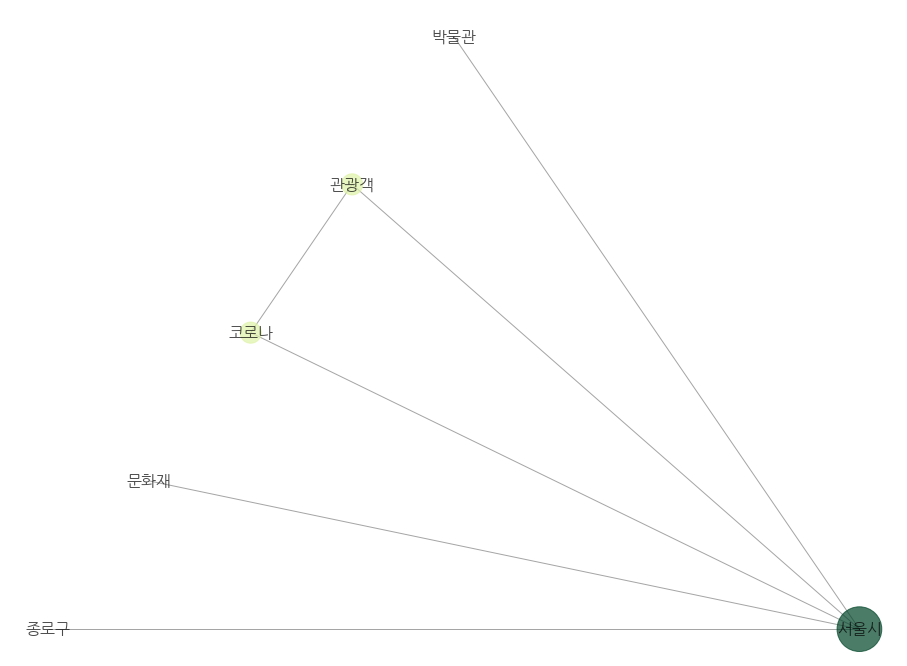

In [19]:
## 네트워크 그래프
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G,font_family='NanumGothic',font_size=16,pos=pos,node_color=list(pr.values()),node_size=nsize,alpha=0.7,
                edge_color='.5',cmap=plt.cm.YlGn)
